In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:
icu_data = pd.read_csv("train1_icu_data.csv")
icu_labels = pd.read_csv("train1_icu_label.csv").values.ravel()

icu_test_data = pd.read_csv("test1_icu_data.csv")
icu_test_labels = pd.read_csv("test1_icu_label.csv").values.ravel()

### Distribution Analysis

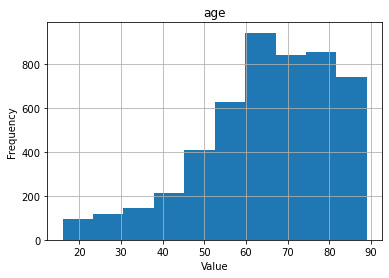

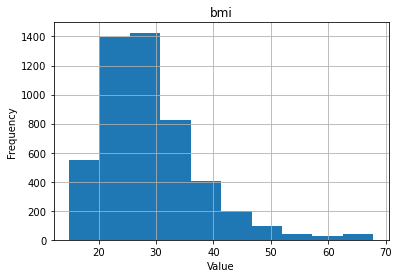

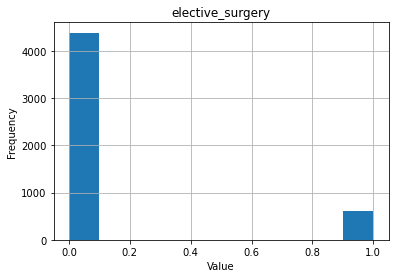

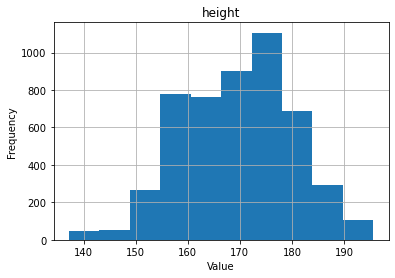

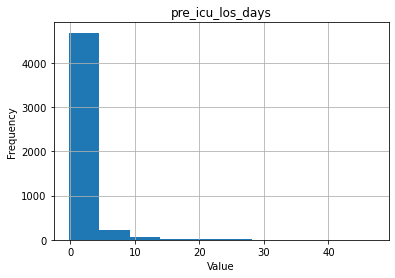

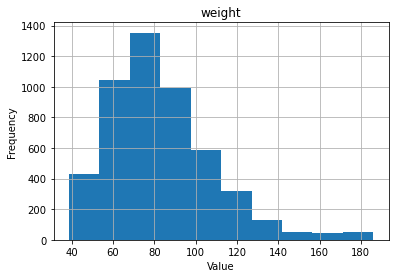

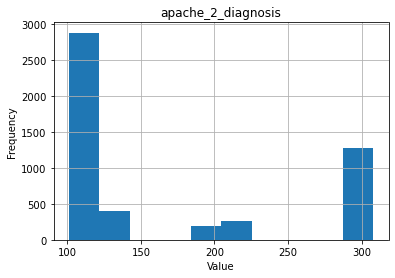

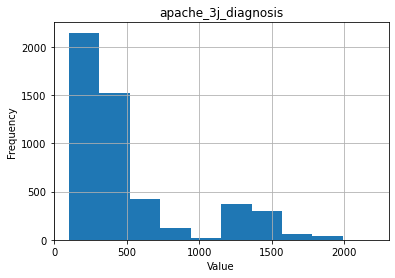

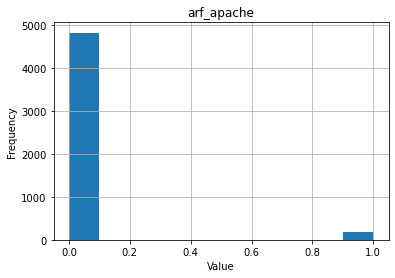

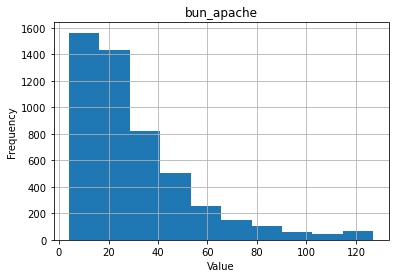

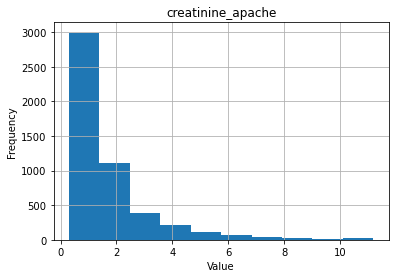

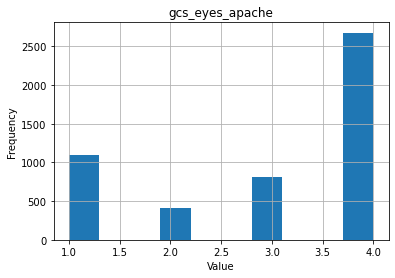

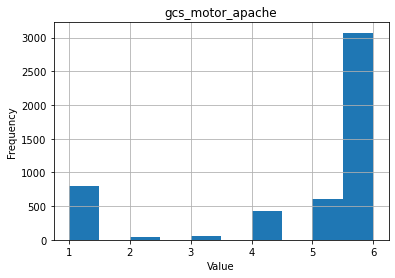

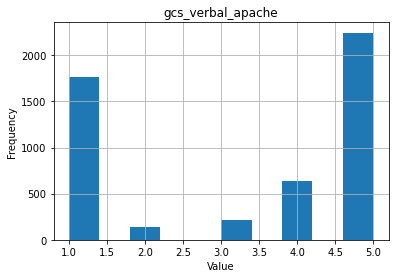

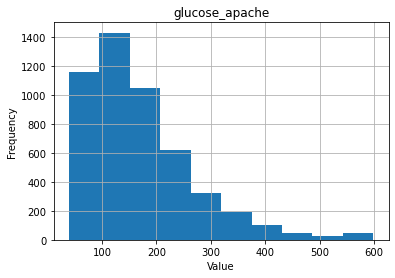

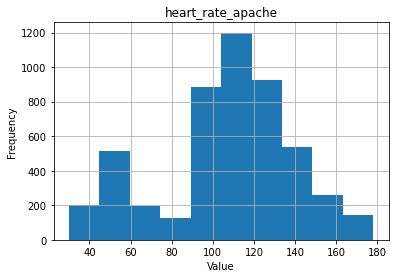

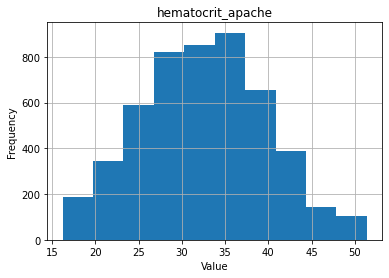

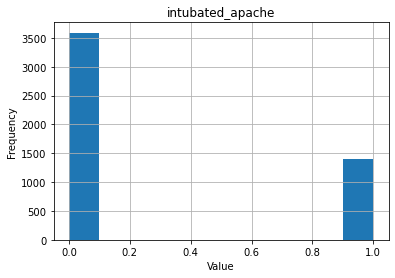

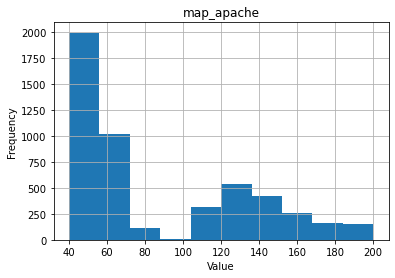

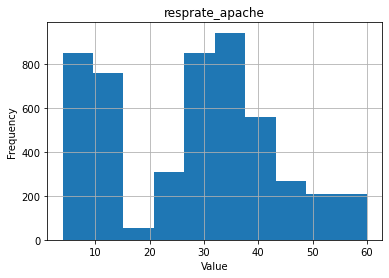

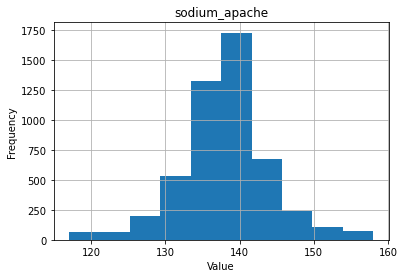

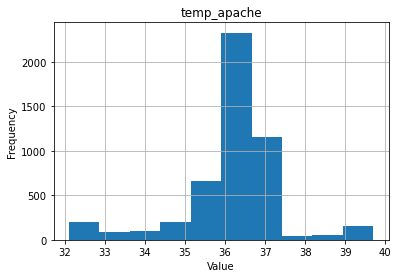

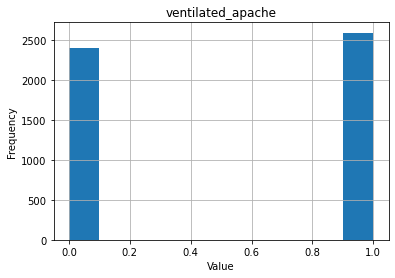

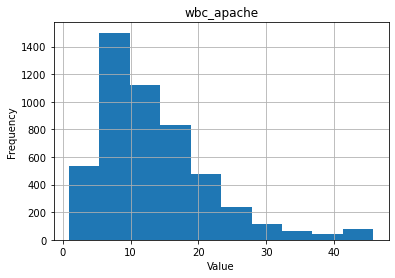

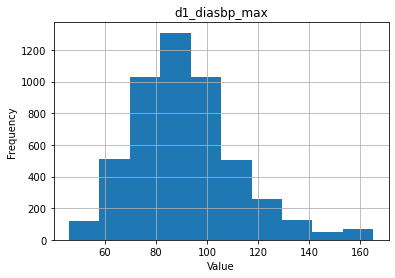

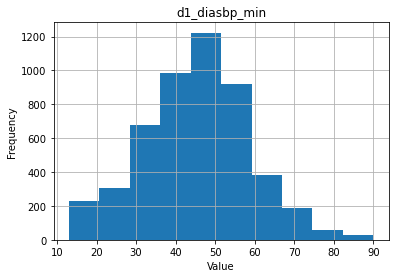

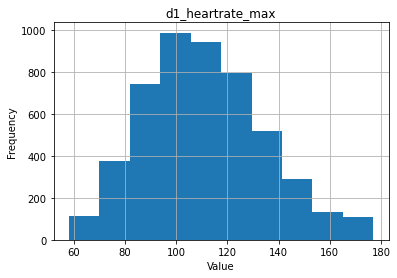

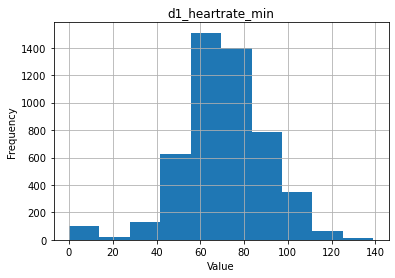

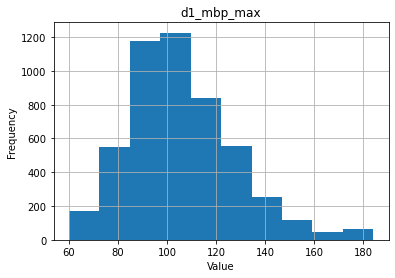

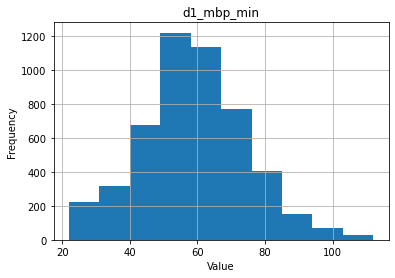

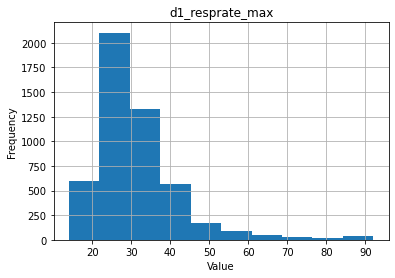

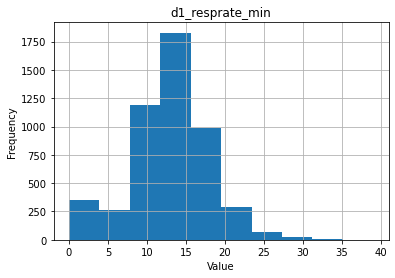

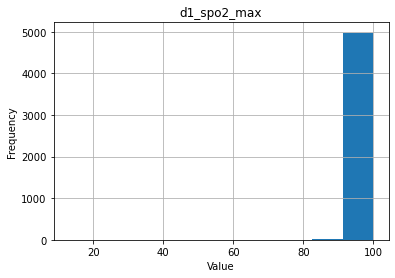

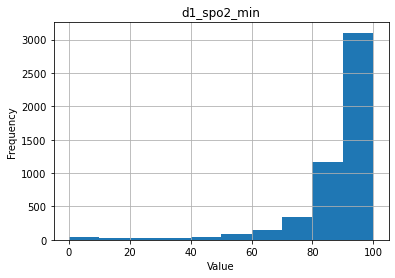

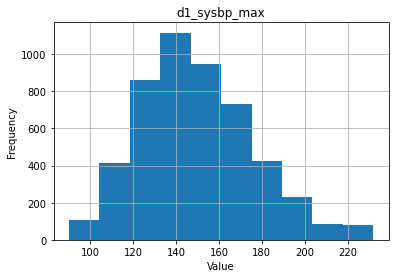

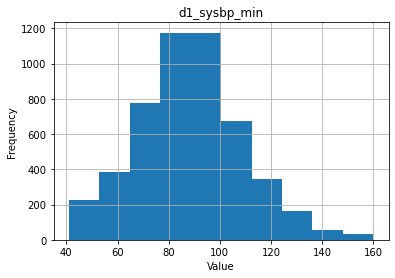

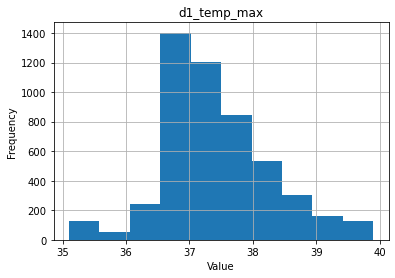

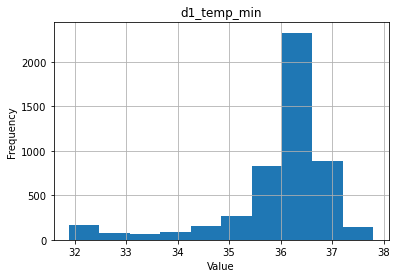

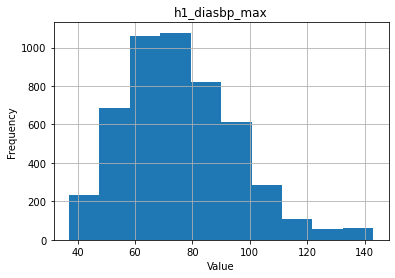

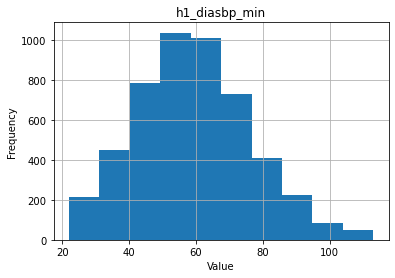

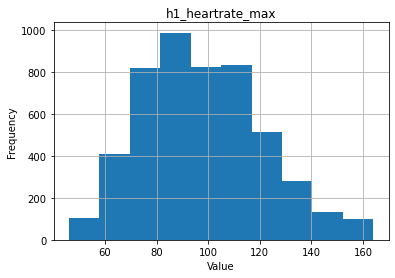

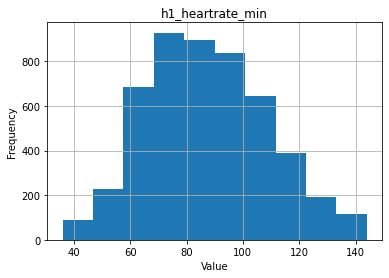

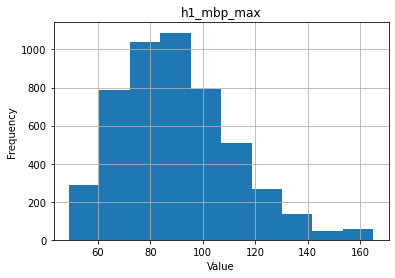

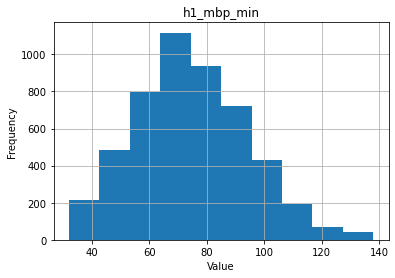

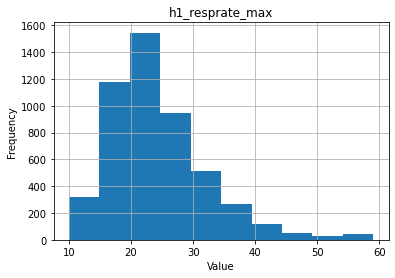

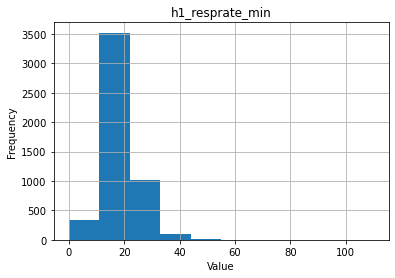

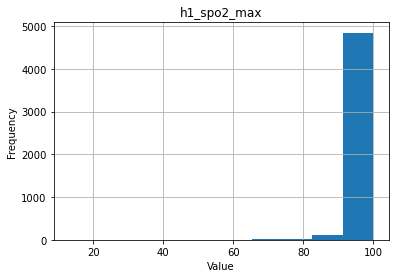

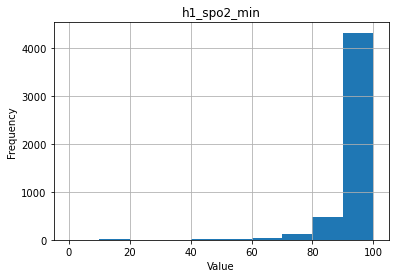

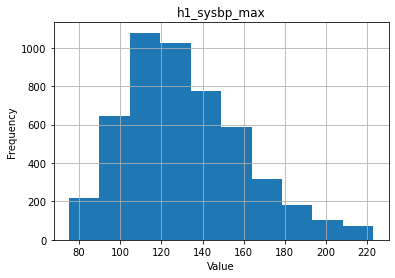

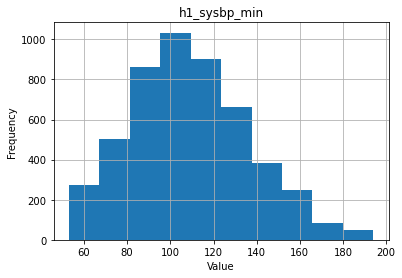

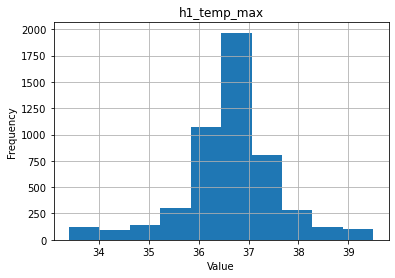

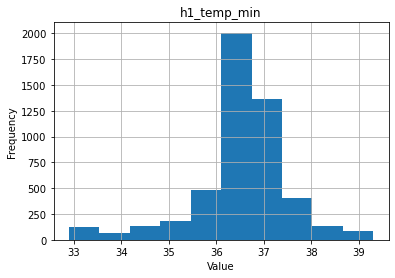

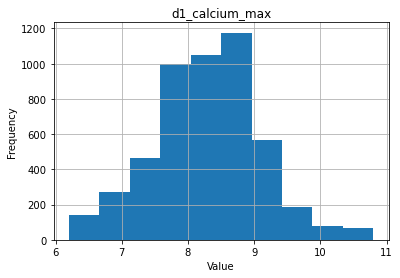

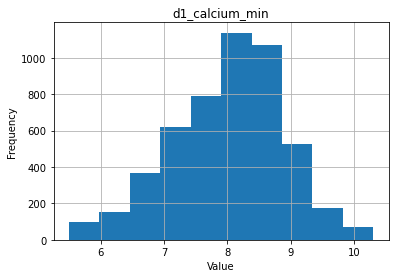

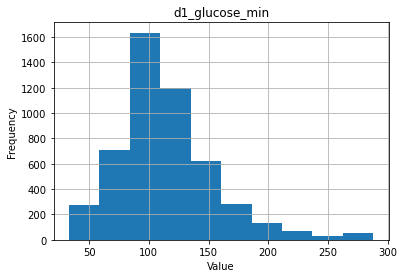

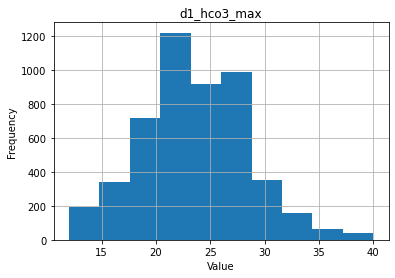

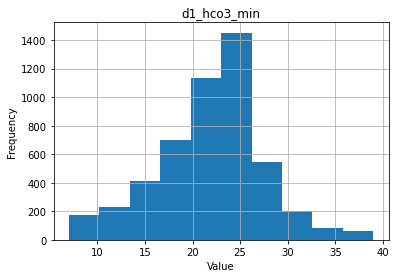

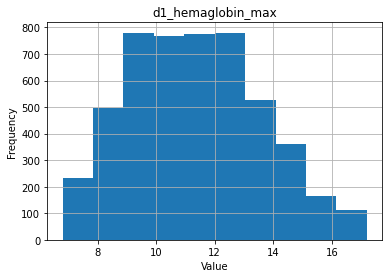

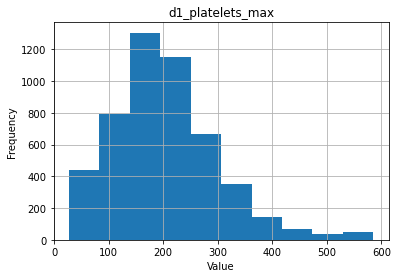

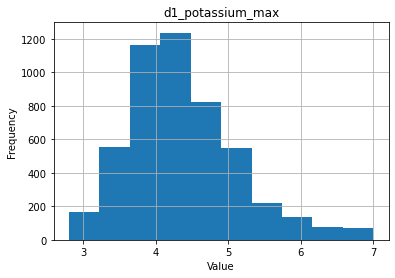

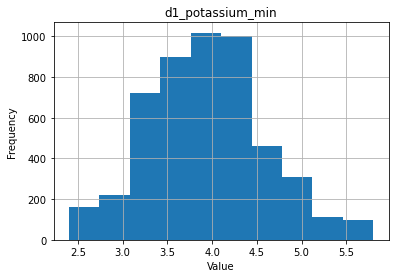

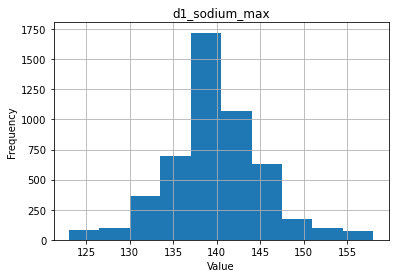

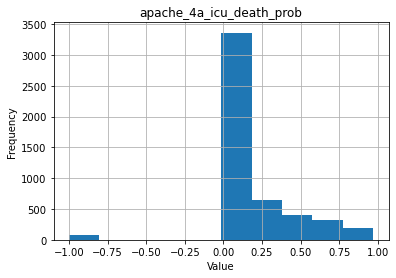

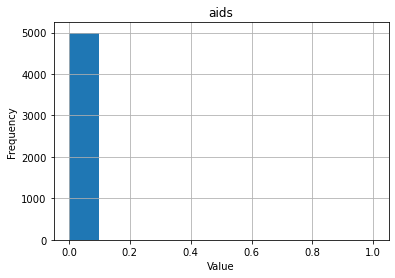

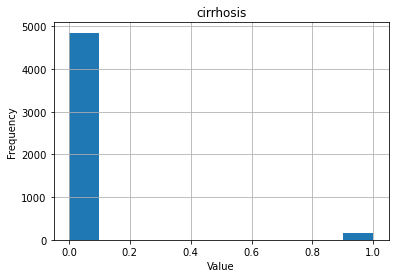

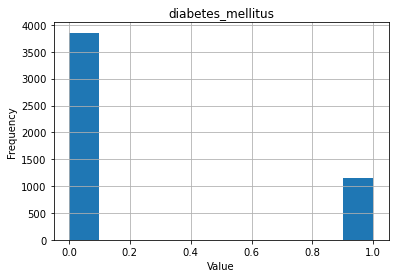

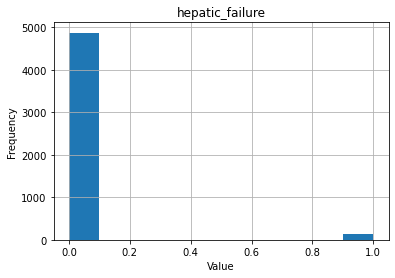

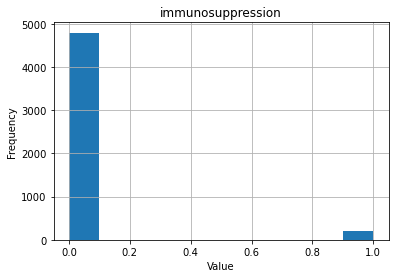

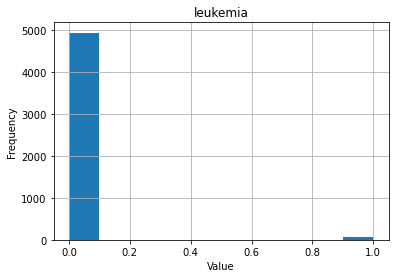

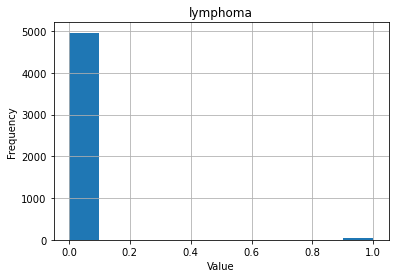

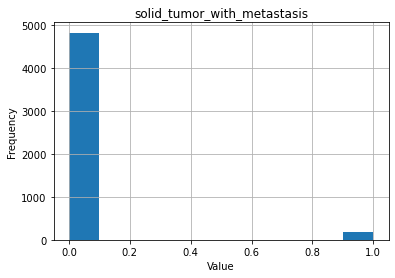

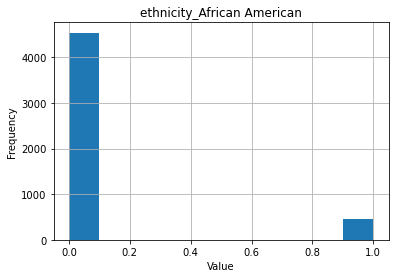

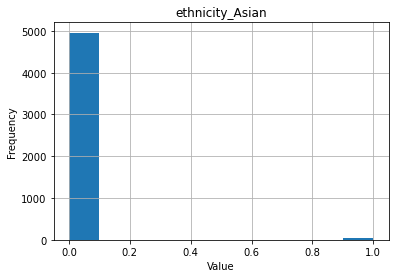

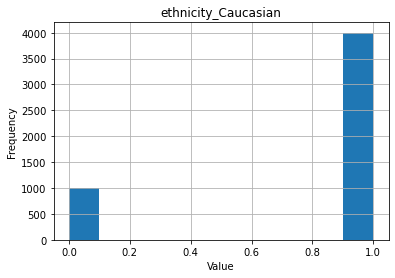

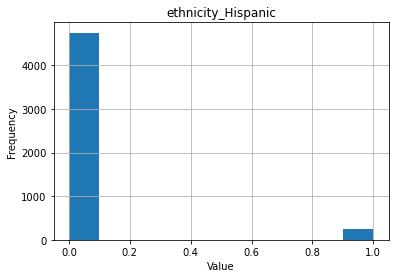

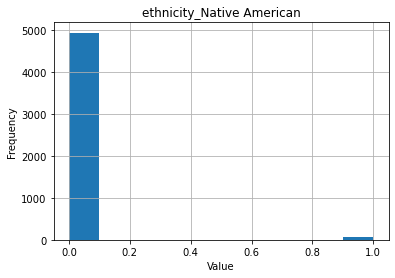

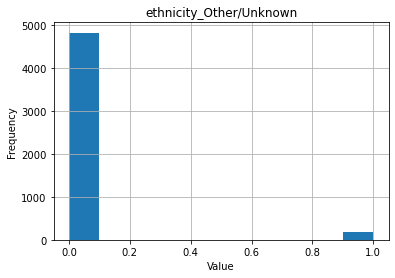

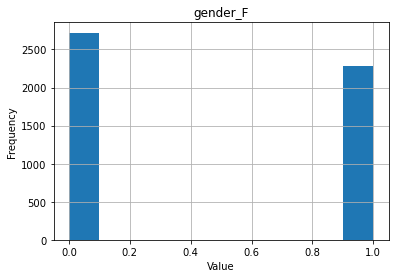

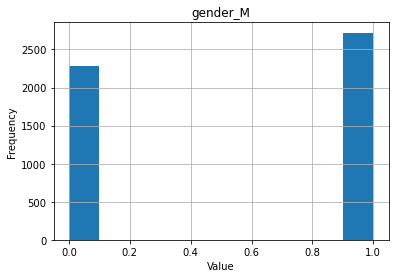

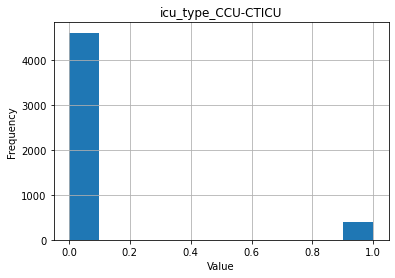

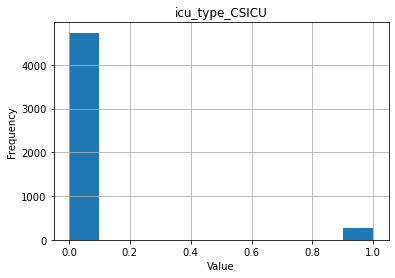

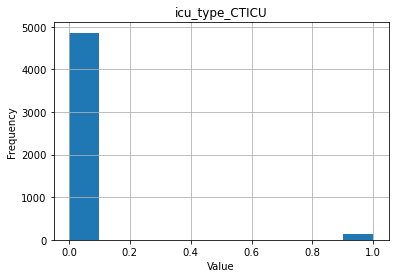

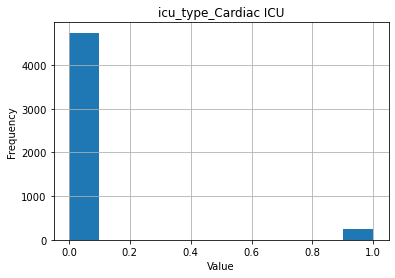

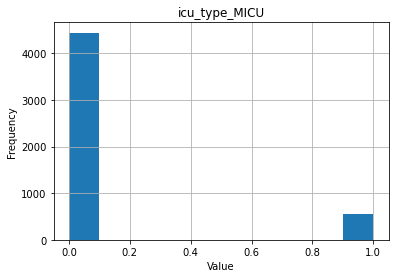

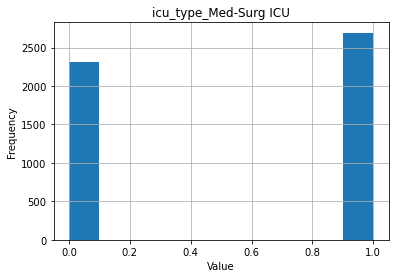

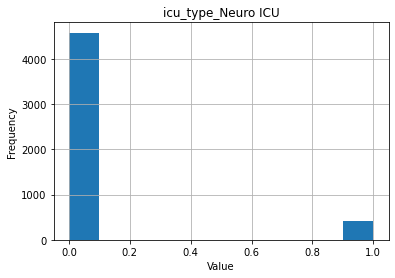

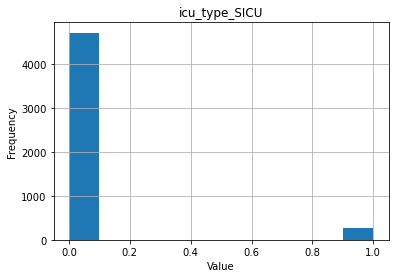

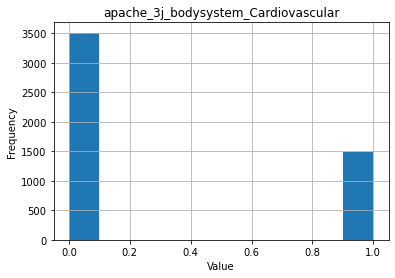

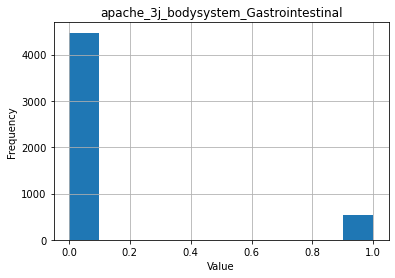

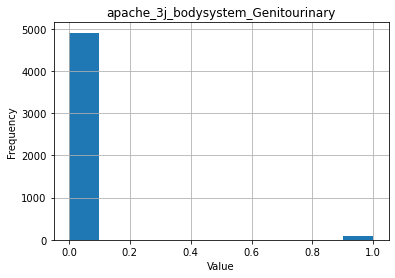

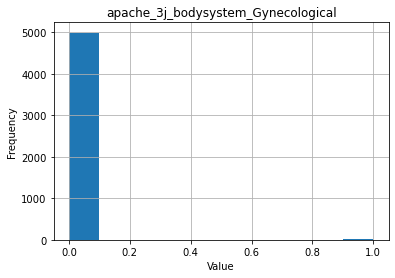

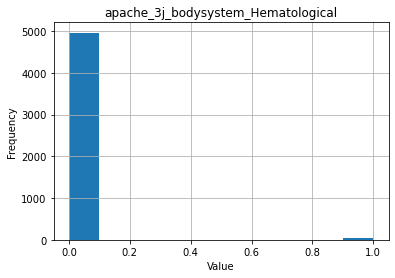

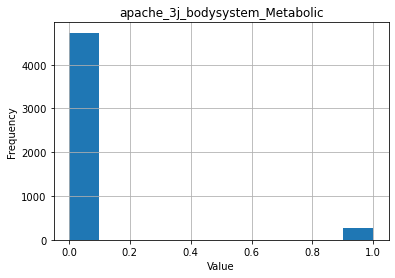

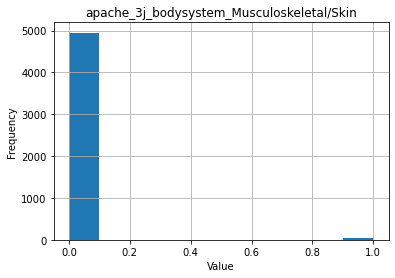

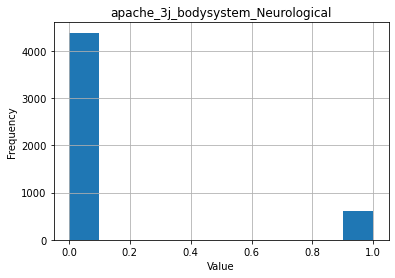

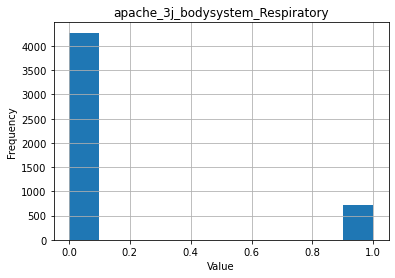

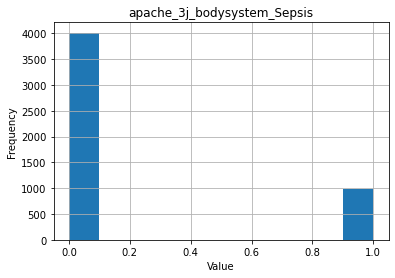

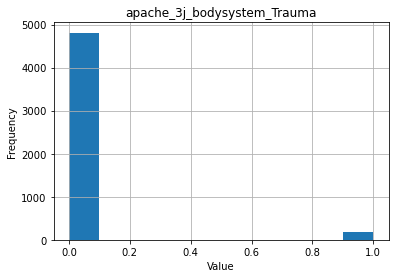

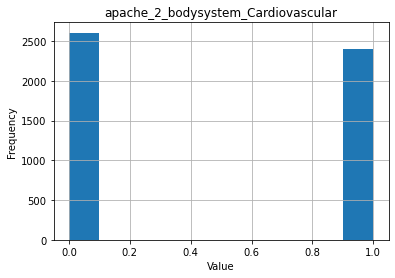

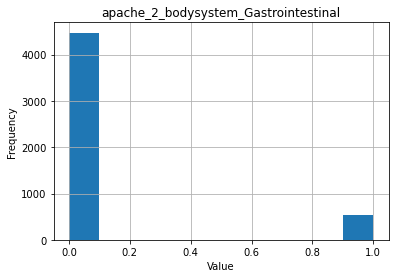

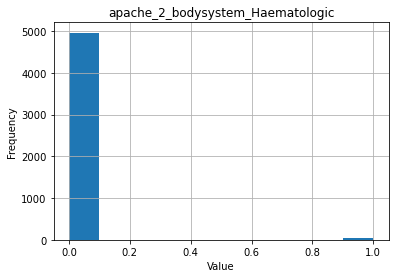

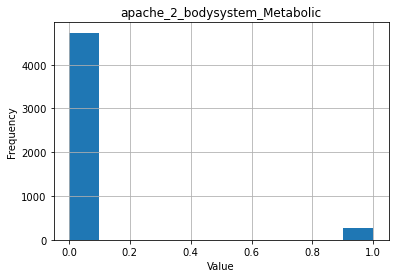

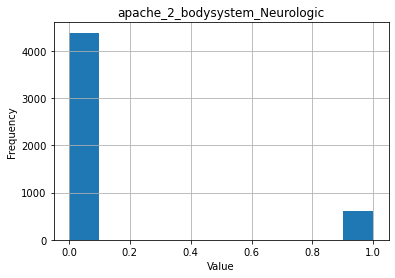

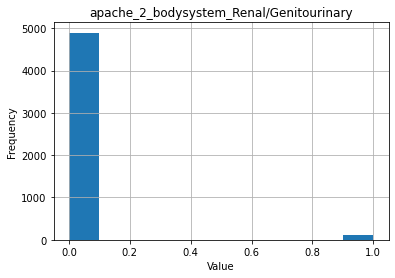

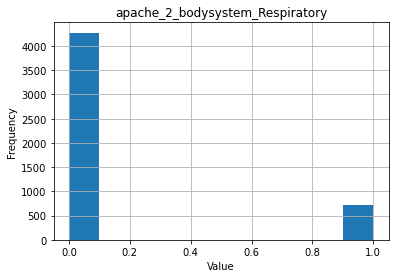

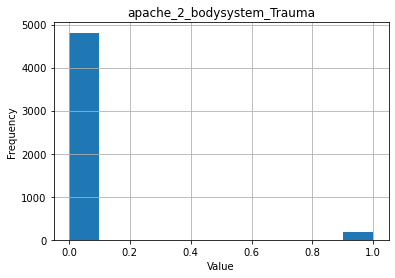

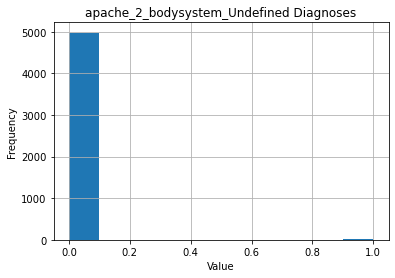

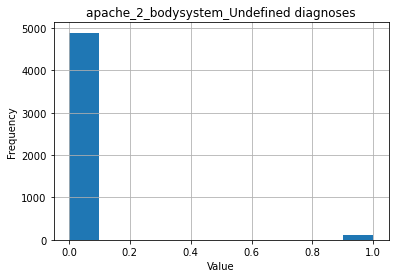

In [3]:
for column in icu_data.columns:
    icu_data[column].hist()
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [21]:
alpha = 0.05

feature_types = {'Gaussian': [], 'Bernoulli': [], 'Multinomial': []}

for column in icu_data.columns:
    unique_values = icu_data[column].nunique()
    
    if unique_values == 2:
        feature_types['Bernoulli'].append(column)
    elif icu_data[column].dtype in ['int64', 'uint8'] and unique_values > 2:
        feature_types['Multinomial'].append(column)
    else: 
        stat, p = shapiro(icu_data[column])
        feature_types['Gaussian'].append(column)

print("Feature types based on data distribution:")
for dist, features in feature_types.items():
    print("\n{} features:".format(dist))
    for feature in features:
        print(f"  - {feature}")


Feature types based on data distribution:

Gaussian features:
  - bmi
  - height
  - pre_icu_los_days
  - weight
  - apache_3j_diagnosis
  - bun_apache
  - creatinine_apache
  - glucose_apache
  - hematocrit_apache
  - resprate_apache
  - sodium_apache
  - temp_apache
  - wbc_apache
  - d1_temp_max
  - d1_temp_min
  - h1_temp_max
  - h1_temp_min
  - d1_calcium_max
  - d1_calcium_min
  - d1_hco3_max
  - d1_hco3_min
  - d1_hemaglobin_max
  - d1_potassium_max
  - d1_potassium_min
  - d1_sodium_max
  - apache_4a_icu_death_prob

Bernoulli features:
  - elective_surgery
  - arf_apache
  - intubated_apache
  - ventilated_apache
  - aids
  - cirrhosis
  - diabetes_mellitus
  - hepatic_failure
  - immunosuppression
  - leukemia
  - lymphoma
  - solid_tumor_with_metastasis
  - ethnicity_African American
  - ethnicity_Asian
  - ethnicity_Caucasian
  - ethnicity_Hispanic
  - ethnicity_Native American
  - ethnicity_Other/Unknown
  - gender_F
  - gender_M
  - icu_type_CCU-CTICU
  - icu_type_CSICU
  

### Naïve Bayes Classification 

In [25]:
gaussian_features = [
    'bmi', 'height', 'pre_icu_los_days', 'weight', 'apache_3j_diagnosis',
    'bun_apache', 'creatinine_apache', 'glucose_apache', 'hematocrit_apache',
    'resprate_apache', 'sodium_apache', 'temp_apache', 'wbc_apache',
    'd1_temp_max', 'd1_temp_min', 'h1_temp_max', 'h1_temp_min', 'd1_calcium_max',
    'd1_calcium_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max',
    'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'apache_4a_icu_death_prob'
]

bernoulli_features = [
    'elective_surgery', 'arf_apache', 'intubated_apache', 'ventilated_apache', 'aids',
    'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
    'lymphoma', 'solid_tumor_with_metastasis', 'ethnicity_African American', 'ethnicity_Asian',
    'ethnicity_Caucasian', 'ethnicity_Hispanic', 'ethnicity_Native American', 'ethnicity_Other/Unknown',
    'gender_F', 'gender_M', 'icu_type_CCU-CTICU', 'icu_type_CSICU', 'icu_type_CTICU', 'icu_type_Cardiac ICU',
    'icu_type_MICU', 'icu_type_Med-Surg ICU', 'icu_type_Neuro ICU', 'icu_type_SICU',
    'apache_3j_bodysystem_Cardiovascular', 'apache_3j_bodysystem_Gastrointestinal',
    'apache_3j_bodysystem_Genitourinary', 'apache_3j_bodysystem_Gynecological',
    'apache_3j_bodysystem_Hematological', 'apache_3j_bodysystem_Metabolic',
    'apache_3j_bodysystem_Musculoskeletal/Skin', 'apache_3j_bodysystem_Neurological',
    'apache_3j_bodysystem_Respiratory', 'apache_3j_bodysystem_Sepsis', 'apache_3j_bodysystem_Trauma',
    'apache_2_bodysystem_Cardiovascular', 'apache_2_bodysystem_Gastrointestinal',
    'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
    'apache_2_bodysystem_Neurologic', 'apache_2_bodysystem_Renal/Genitourinary',
    'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
    'apache_2_bodysystem_Undefined Diagnoses', 'apache_2_bodysystem_Undefined diagnoses'
]

multinomial_features = [
    'age', 'apache_2_diagnosis', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
    'heart_rate_apache', 'map_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max',
    'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min',
    'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'h1_diasbp_max',
    'h1_diasbp_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
    'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
    'h1_sysbp_min'
]

gaussian_clf = GaussianNB()
bernoulli_clf = BernoulliNB()
multinomial_clf = MultinomialNB()

gaussian_clf.fit(icu_data[gaussian_features], icu_labels)
bernoulli_clf.fit(icu_data[bernoulli_features], icu_labels)
multinomial_clf.fit(icu_data[multinomial_features], icu_labels)

gaussian_cv_scores = cross_val_score(gaussian_clf, icu_data[gaussian_features], icu_labels, cv=5)
bernoulli_cv_scores = cross_val_score(bernoulli_clf, icu_data[bernoulli_features], icu_labels, cv=5)
multinomial_cv_scores = cross_val_score(multinomial_clf, icu_data[multinomial_features], icu_labels, cv=5)

print(f"GaussianNB Cross-Validation Accuracy: {np.mean(gaussian_cv_scores)}")
print(f"BernoulliNB Cross-Validation Accuracy: {np.mean(bernoulli_cv_scores)}")
print(f"MultinomialNB Cross-Validation Accuracy: {np.mean(multinomial_cv_scores)}")

gaussian_preds = gaussian_clf.predict_proba(icu_test_data[gaussian_features])[:, 1]
bernoulli_preds = bernoulli_clf.predict_proba(icu_test_data[bernoulli_features])[:, 1]
multinomial_preds = multinomial_clf.predict_proba(icu_test_data[multinomial_features])[:, 1]

final_preds = (gaussian_preds + bernoulli_preds + multinomial_preds) / 3
final_preds = np.round(final_preds) 

final_pred_accuracy = accuracy_score(icu_test_labels, final_preds)
print(f"Final Prediction Accuracy: {final_pred_accuracy}")

test_error = 1 - accuracy_score(icu_test_labels, final_preds)
print(f"Test Error: {test_error}")


GaussianNB Cross-Validation Accuracy: 0.7101999999999999
BernoulliNB Cross-Validation Accuracy: 0.7070000000000001
MultinomialNB Cross-Validation Accuracy: 0.6652
Final Prediction Accuracy: 0.740200546946217
Test Error: 0.25979945305378305


### Minimal-risk Bayesian decision criterion table

In [29]:
posterior_probs = final_preds

loss_fn = 5
loss_fp = 1

expected_risk_0 = posterior_probs * loss_fp
expected_risk_1 = (1 - posterior_probs) * loss_fn

minimal_risk_predictions = (expected_risk_0 > expected_risk_1).astype(int)

minimal_risk_test_error = 1 - accuracy_score(icu_test_labels, minimal_risk_predictions)
print(f"Minimal Risk Test Error: {minimal_risk_test_error}")


Minimal Risk Test Error: 0.25979945305378305
